In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [9]:
df = pd.read_excel("C:\\Users\\rohan\\Downloads\\Internship Ineuron\\Financial Analytics\\Top 500 Companies - India.xlsx")

In [4]:
df

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [6]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [5]:
df.isnull()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
483,False,False,False,False
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False


<AxesSubplot:>

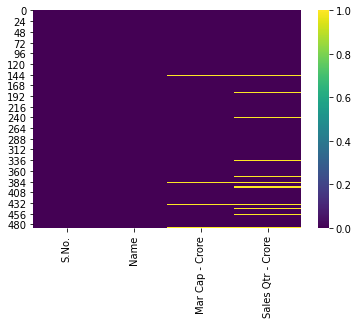

In [3]:
sns.heatmap(df.isnull(),cmap="viridis",)

<AxesSubplot:>

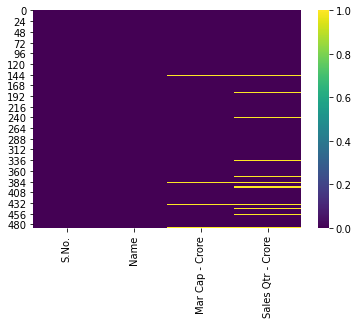

In [7]:
sns.heatmap(df.isnull(),cmap="viridis",hue="")

In [ ]:
sns.heatmap(df.isnull(),cmap="viridis",)

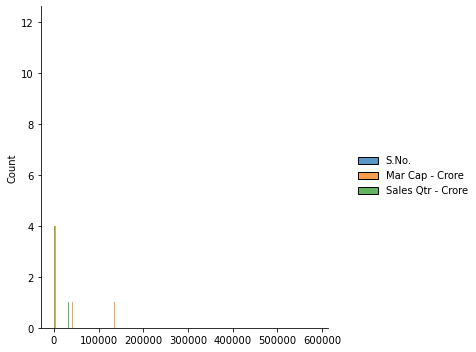

In [10]:
sns.displot(data=df , kde = False,bins=50000)

In [4]:
df.shape

(488, 4)

In [12]:
df.columns.values

array(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'],
      dtype=object)

In [13]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')>

In [14]:
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
dtype: object

In [6]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,480.000000,460.000000
mean,251.508197,27985.688667,3799.779000
std,145.884078,59416.180611,9980.041195
min,1.000000,123.000000,0.000000
25%,122.750000,4827.737500,533.717500
50%,252.500000,9727.095000,1131.640000
75%,378.250000,23543.850000,2717.972500
max,500.000000,583436.720000,110666.930000


In [21]:
df.info(verbose="True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [25]:
missing = pd.DataFrame(df.isnull().sum())
plt.show()

In [26]:
missing

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,29


C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


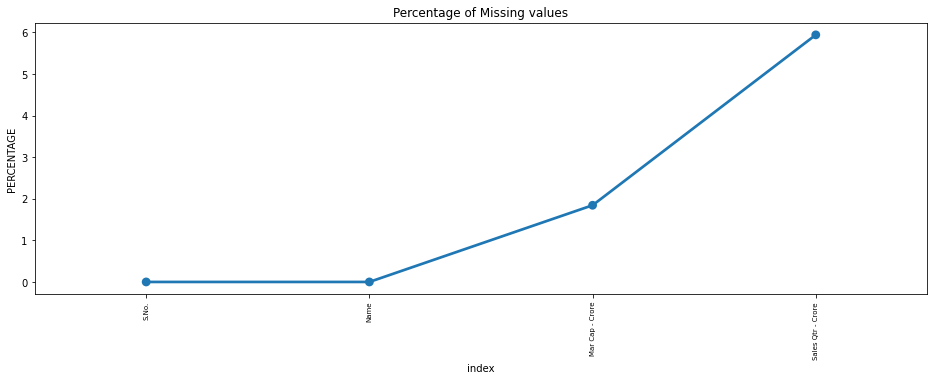

In [29]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

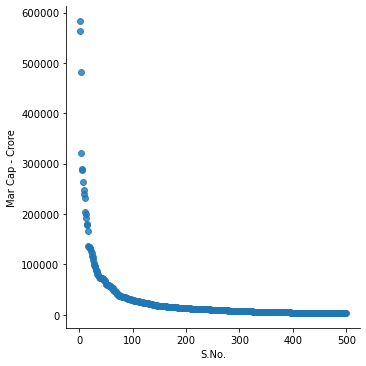

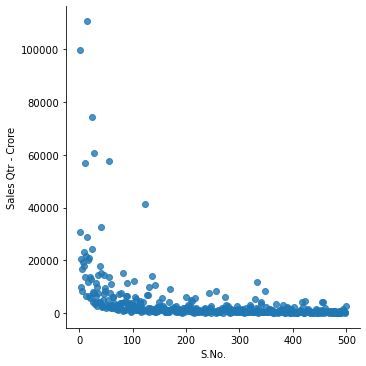

In [33]:
sns.lmplot(data=df, x='S.No.', y='Mar Cap - Crore', fit_reg=False)
sns.lmplot(data=df, x='S.No.', y='Sales Qtr - Crore', fit_reg=False)

In [35]:
df[["Sales Qtr - Crore"]]

,Sales Qtr - Crore
0,99810.00
1,30904.00
2,20581.27
3,9772.02
4,16840.51
...,...
483,790.17
484,249.27
485,511.53
486,2840.75


In [6]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Multivariate Analysis

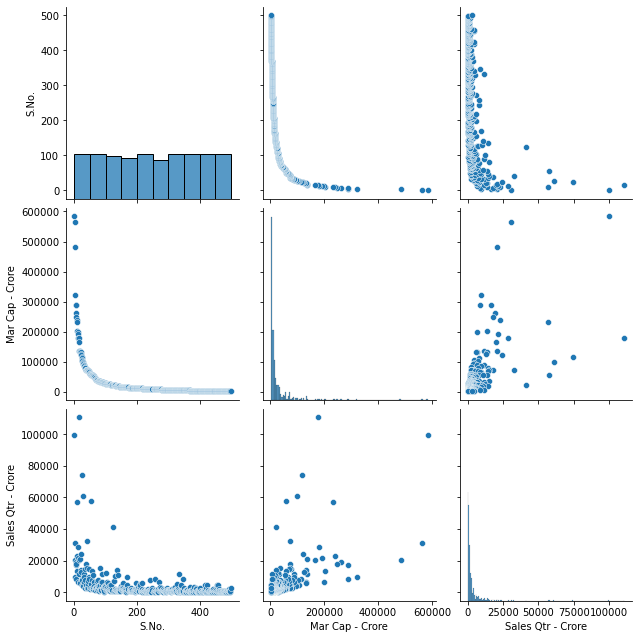

In [41]:
sns.pairplot(df,height=3)

Here are some missing values in column Market Cap and sales quarter ,we are replacing that with mean value

In [18]:
mean_val = df['Mar Cap - Crore'].mean()

In [24]:
df['Mar Cap - Crore'].fillna(value = mean_val ,inplace=True)

In [12]:
mean_value = df["Sales Qtr - Crore"].mean()

In [14]:
df["Sales Qtr - Crore"].fillna(value = mean_value ,inplace = True)

Here we changed the NaN value to mean value

In [23]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.857119,3807.789412
std,145.884078,58912.585788,9687.458059
min,1.000000,3017.070000,0.000000
25%,122.750000,4879.612500,570.035000
50%,252.500000,10380.425000,1276.255000
75%,378.250000,25502.085000,3753.280000
max,500.000000,583436.720000,110666.930000


In [25]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
import statistics

In [5]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [6]:
np.mean(df["Mar Cap - Crore"])

28043.857118997887

In [8]:
np.mean(df["Sales Qtr - Crore"])

3807.7894117647006

In [18]:
np.median(df["Sales Qtr - Crore"])

nan

In [19]:
np.median(df["Mar Cap - Crore"])

nan

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mar Cap - Crore'>

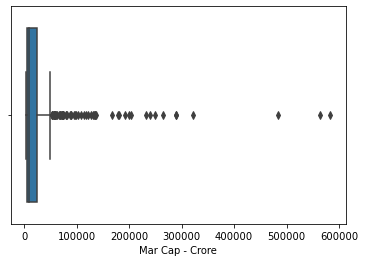

In [9]:
sns.boxplot(df["Mar Cap - Crore"])

In [21]:
# there are more number of outliers

<AxesSubplot:xlabel='Mar Cap - Crore', ylabel='Count'>

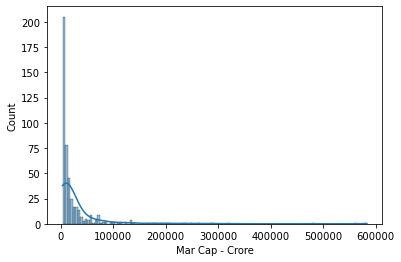

In [23]:
sns.histplot(df["Mar Cap - Crore"],kde = True) # kde is a line which smoothen the histogram

In [24]:
# there is no normal distribution 
# it is skew towards right
# doesn't follow gaussian distribution

<AxesSubplot:xlabel='Sales Qtr - Crore', ylabel='Count'>

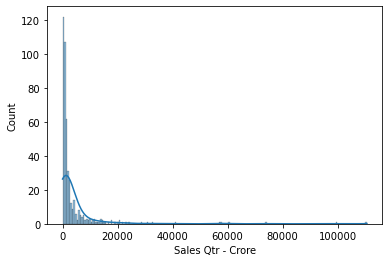

In [25]:
sns.histplot(df["Sales Qtr - Crore"],kde = True)

In [26]:
# there is no normal distribution 
# it is skew towards right
# doesn't follow gaussian distribution

In [7]:
np.percentile(df["Sales Qtr - Crore"],[25,75])

array([nan, nan])

In [10]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,460.000000
mean,251.508197,27717.580471,3801.735522
std,145.884078,58970.889847,9979.407015
min,1.000000,3000.000000,0.000000
25%,122.750000,4827.737500,535.255000
50%,252.500000,9595.070000,1131.640000
75%,378.250000,23506.105000,2717.972500
max,500.000000,583436.720000,110666.930000


In [11]:
df = df.replace(np.nan,0)

In [12]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27717.580471,3583.603156
std,145.884078,58970.889847,9728.619539
min,1.000000,3000.000000,0.000000
25%,122.750000,4827.737500,460.622500
50%,252.500000,9595.070000,985.470000
75%,378.250000,23506.105000,2580.797500
max,500.000000,583436.720000,110666.930000


In [17]:
df= df.replace(0,985.47)

In [6]:
df.median()

<ipython-input-6-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


S.No.                 252.50
Mar Cap - Crore      9595.07
Sales Qtr - Crore    1131.64
dtype: float64

In [10]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,488.000000,488.000000
mean,251.508197,27717.580471,3648.496598
std,145.884078,58970.889847,9708.208062
min,1.000000,3000.000000,0.000000
25%,122.750000,4827.737500,570.035000
50%,252.500000,9595.070000,1131.000000
75%,378.250000,23506.105000,2580.797500
max,500.000000,583436.720000,110666.930000


In [7]:
# here we replaced Blank spacesand NaN value in Sales Qtr-Crore with median 1131 crore